In [1]:
import requests

answer = requests.get("https://apidata.mos.ru/version")

print(answer.text)

{"Version":1}


In [10]:
token = "fb27aacca82ec1ca52dc7bcd34011646"
answer = requests.get(f"https://apidata.mos.ru/v1/datasets?api_key={token}")

data = answer.json()
print("Всего записей:", len(data))
for row in data:
    print(row['Id'], row['Caption'], row['PublishDate'])

Всего записей: 905
493 Дома культуры и клубы 16.10.2013
495 Кинотеатры 11.10.2013
498 Аттракционы в скверах и парках 07.10.2013
499 Организации, находящиеся в ведомственном подчинении Департамента жилищно-коммунального хозяйства города Москвы 03.04.2014
500 Государственные казенные учреждения «Инженерные службы» районов города Москвы 14.01.2014
501 (Архив) Аптеки 05.11.2013
502 Больницы детские и специализированные 07.10.2013
503 Поликлиническая помощь взрослым 07.10.2013
504 Госпитали для ветеранов 07.10.2013
505 Поликлиническая помощь детям 07.10.2013
506 Стоматологические поликлиники детские 07.10.2013
507 Диспансеры 07.10.2013
508 (Архив) Дома ребенка 07.10.2013
509 Женские консультации 07.10.2013
510 Санатории 18.10.2013
512 Молочные кухни 07.10.2013
514 Родильные дома 07.10.2013
515 Станции переливания крови 07.10.2013
516 Скорая и неотложная медицинская помощь 11.10.2013
517 Больницы взрослые 07.10.2013
518 Стоматологические поликлиники взрослые 07.10.2013
519 Хосписы 07.10.2013

In [12]:
answer = requests.get(f"https://apidata.mos.ru/v1/datasets/61701"
                      f"?api_key={token}")

data = answer.json()
print(data)

{'Id': 61701, 'IdentificationNumber': '7704786030-RaspolozheniestatsionarnyhkomplexovfotovideofixatsiinarusheniyPravildorozhnogodvizheniyaRossiyskoyFederatsii', 'CategoryId': 13, 'CategoryCaption': 'Дороги и транспорт', 'DepartmentId': 14, 'DepartmentCaption': 'Департамент транспорта и развития дорожно-транспортной инфраструктуры города Москвы', 'Caption': 'Расположение стационарных комплексов фотовидеофиксации нарушений Правил дорожного движения Российской Федерации', 'Description': 'Комплексы фотовидеофиксации нарушений правил дорожного движения, расположенные на территории города Москвы', 'FullDescription': '<p style="margin-left:0cm; margin-right:0cm"><span style="font-size:11pt"><span style="font-family:Calibri,sans-serif"><span style="font-size:9.0pt"><span style="font-family:&quot;Tahoma&quot;,&quot;sans-serif&quot;">Набор данных позволяет получить подробную информацию о местах установки стационарных комплексов фотовидеофиксации нарушений ПДД РФ на территории г. Москвы. </span><

In [15]:
import pandas as pd
from pandas.io.json import json_normalize

answer = requests.get(f"https://apidata.mos.ru/v1/datasets/61701/rows"
                      f"?api_key={token}")

data = answer.json()
df = json_normalize(data)

In [16]:
df.head()

,Cells.AdmArea,Cells.District,Cells.Latitude_WGS84,Cells.Location,Cells.Longitude_WGS84,Cells.Name,Cells.geoData.coordinates,Cells.geoData.type,Cells.global_id,Number,global_id
0,Юго-Восточный административный округ,Рязанский район,55.717986,"Проектируемый пр-д №770, у д.26 по ул. Саратов...",37.751109,Стационарный комплекс фотовидеофиксации наруше...,"[37.751109, 55.717986]",Point,1010964311,1,1010964311
1,Западный административный округ,район Ново-Переделкино,55.634586,"Боровское ш., д.56, из центра, г. Москва",37.346156,Стационарный комплекс фотовидеофиксации наруше...,"[37.346156, 55.634586]",Point,1010964320,2,1010964320
2,Северный административный округ,район Восточное Дегунино,55.879282,"Дмитровское ш., д.98, с.1, из ЦЕНТРА, г. Москва",37.546018,Стационарный комплекс фотовидеофиксации наруше...,"[37.546018, 55.879282]",Point,1010964415,3,1010964415
3,Юго-Восточный административный округ,район Марьино,55.642928,"Батайский проезд, д.31, г. Москва",37.7216,Стационарный комплекс фотовидеофиксации наруше...,"[37.7216, 55.642928]",Point,1010965346,4,1010965346
4,Южный административный округ,район Чертаново Южное,55.604426,"ул.Подольских Курсантов, д.18, к.2, г. Москва",37.632263,Стационарный комплекс фотовидеофиксации наруше...,"[37.632263, 55.604426]",Point,1010965347,5,1010965347


In [21]:
df.describe()

,Cells.global_id,Number,global_id,lat,lon
count,2.491000e+03,2491.000000,2.491000e+03,2491.000000,2491.000000
mean,1.011053e+09,1246.000000,1.011053e+09,55.734809,37.578127
std,6.757706e+05,719.234083,6.757706e+05,0.102548,0.148310
min,1.010964e+09,1.000000,1.010964e+09,55.234425,36.841796
25%,1.010965e+09,623.500000,1.010965e+09,55.665675,37.490074
50%,1.010966e+09,1246.000000,1.010966e+09,55.735510,37.584507
75%,1.010966e+09,1868.500000,1.010966e+09,55.805216,37.667958
max,1.016276e+09,2491.000000,1.016276e+09,56.011959,37.934461


In [18]:
df["lat"] = df["Cells.Latitude_WGS84"].astype("float")
df["lon"] = df["Cells.Longitude_WGS84"].astype("float")

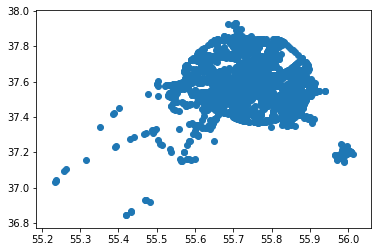

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df["lat"], df["lon"])